In [224]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict

ModuleNotFoundError: No module named 'seaborn'

In [86]:
data = np.load('others/others/logs/disc_dqn_buffer06242020-11-59-38/diagnostics.npy', allow_pickle=True)

In [256]:
def process_data(data):
    new_dict = defaultdict(list)
    for t, d in enumerate(data):
        for k, val in d.items():
            assert(len(new_dict[k]) == t)
            if val is None:
                val = 0
            if isinstance(val, list):
                val = val[0]
            new_dict[k].append(val)
            
        new_dict['epoch'].append(t)
        new_dict['training_success_rate'].append(d['num_success']/100)
    return new_dict


In [271]:
disc = process_data(data)
with2k = process_data(np.load('others/others/logs/disc_dqn_2kdata06242020-14-36-07//diagnostics.npy', allow_pickle=True))
with2kpretrain50 = process_data(np.load('others/others/logs/disc_dqn_2k_pretrain5006242020-15-15-01/diagnostics.npy', allow_pickle=True))
with2kpretrain100 = process_data(np.load('others/others/logs/disc_dqn_pretrain10006242020-15-14-33//diagnostics.npy', allow_pickle=True))
with2kpretrain10 = process_data(np.load('others/others/logs/disc_dqn_pretrain1006242020-16-50-22//diagnostics.npy', allow_pickle=True))
pos2knegpretrain50 = process_data(np.load('others/others/logs/disc_dqn_2kpos2kneg_pretrain5006242020-16-56-44//diagnostics.npy', allow_pickle=True))
pos2knegpretrain100 = process_data(np.load('others/others/logs/disc_dqn_posneg10006242020-17-48-57//diagnostics.npy', allow_pickle=True))
oriented = process_data(np.load('others/others/logs/disc_dqn_oriented06242020-18-44-53/diagnostics.npy', allow_pickle=True))
oriented2 = process_data(np.load('others/others/logs/disc_dqn_oriented06242020-21-06-30/diagnostics.npy', allow_pickle=True))




In [258]:
disc.keys()

dict_keys(['num_samples_total', 'num_training_samples', 'num_validation_samples', 'total_time', 'time', 'average_training_loss', 'validation_loss', 'num_envs', 'num_success', 'average_success_ratio_per_env', 'average_tries_per_env', 'envs_with_success_ratio', 'sampler_infos', 'training_successes', 'eval_successes', 'epoch', 'training_success_rate'])

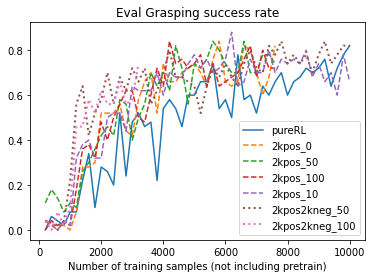

In [259]:
#plt.plot(disc['num_samples_total'], disc['training_success_rate'], label='training')
plt.plot(disc['num_samples_total'], disc['eval_successes'], label='pureRL', linewidth=1.5)
#plt.plot(disc['num_samples_total'], disc['training_successes'], label='training')
plt.plot(with2k['num_samples_total'], with2k['eval_successes'], label='2kpos_0',linestyle='--')
#plt.plot(with2k['num_samples_total'], with2k['training_successes'], label='t2kraining')
plt.plot(with2kpretrain50['num_samples_total'], with2kpretrain50['eval_successes'], label='2kpos_50',linestyle='--')
plt.plot(with2kpretrain100['num_samples_total'], with2kpretrain100['eval_successes'], label='2kpos_100',linestyle='--')
plt.plot(with2kpretrain10['num_samples_total'], with2kpretrain10['eval_successes'], label='2kpos_10',linestyle='--')
plt.plot(pos2knegpretrain50['num_samples_total'], pos2knegpretrain50['eval_successes'], label='2kpos2kneg_50',linestyle=':', linewidth=2)
plt.plot(pos2knegpretrain100['num_samples_total'], pos2knegpretrain100['eval_successes'], label='2kpos2kneg_100', linestyle=':', linewidth=2)

#plt.plot(with2kpretrain['num_samples_total'], with2kpretrain['training_successes'], label='2kpretraintraining')
plt.title("Eval Grasping success rate")
plt.xlabel("Number of training samples (not including pretrain)")
plt.legend()

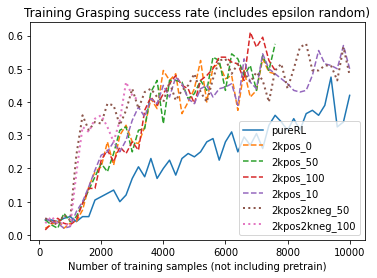

In [276]:
#plt.plot(disc['num_samples_total'], disc['training_success_rate'], label='training')
plt.plot(disc['num_samples_total'], disc['training_successes'], label='pureRL', linewidth=1.5)
#plt.plot(disc['num_samples_total'], disc['training_successes'], label='training')
plt.plot(with2k['num_samples_total'], with2k['training_successes'], label='2kpos_0',linestyle='--')
#plt.plot(with2k['num_samples_total'], with2k['training_successes'], label='t2kraining')
plt.plot(with2kpretrain50['num_samples_total'], with2kpretrain50['training_successes'], label='2kpos_50',linestyle='--')
plt.plot(with2kpretrain100['num_samples_total'], with2kpretrain100['training_successes'], label='2kpos_100',linestyle='--')
plt.plot(with2kpretrain10['num_samples_total'], with2kpretrain10['training_successes'], label='2kpos_10',linestyle='--')
plt.plot(pos2knegpretrain50['num_samples_total'], pos2knegpretrain50['training_successes'], label='2kpos2kneg_50',linestyle=':', linewidth=2)
plt.plot(pos2knegpretrain100['num_samples_total'], pos2knegpretrain100['training_successes'], label='2kpos2kneg_100', linestyle=':', linewidth=2)

#plt.plot(with2kpretrain['num_samples_total'], with2kpretrain['training_successes'], label='2kpretraintraining')
plt.title("Training Grasping success rate (includes epsilon random)")
plt.xlabel("Number of training samples (not including pretrain)")
plt.legend()

In [260]:
disc_theta =  process_data(np.load('others/others/logs/disc_dqn_theta06242020-17-55-42/diagnostics.npy', allow_pickle=True))

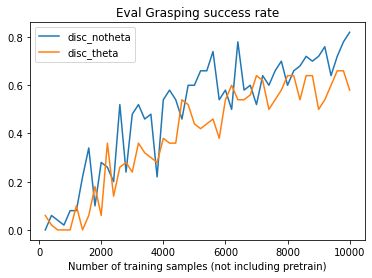

In [261]:
plt.plot(disc['num_samples_total'], disc['eval_successes'], label='disc_notheta', linewidth=1.5)
plt.plot(disc_theta['num_samples_total'], disc_theta['eval_successes'], label='disc_theta', linewidth=1.5)
plt.title("Eval Grasping success rate")
plt.xlabel("Number of training samples (not including pretrain)")
plt.legend()

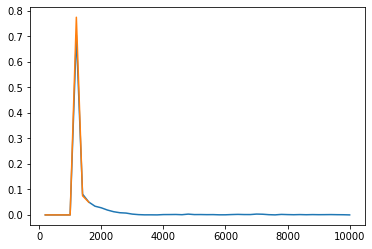

In [273]:
plt.plot(oriented['num_samples_total'], oriented['average_training_loss'])
plt.plot(oriented2['num_samples_total'], oriented2['average_training_loss'])

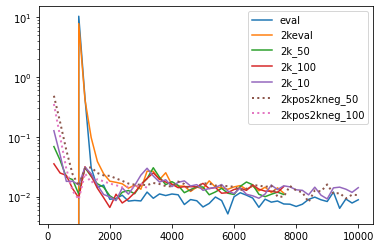

In [263]:
#plt.plot(disc['num_samples_total'], disc['training_success_rate'], label='training')
plt.semilogy(disc['num_samples_total'], disc['average_training_loss'], label='eval')
#plt.plot(disc['num_samples_total'], disc['training_successes'], label='training')
plt.semilogy(with2k['num_samples_total'], with2k['average_training_loss'], label='2keval')
#plt.plot(with2k['num_samples_total'], with2k['training_successes'], label='t2kraining')
plt.semilogy(with2kpretrain50['num_samples_total'], with2kpretrain50['average_training_loss'], label='2k_50')
plt.semilogy(with2kpretrain100['num_samples_total'], with2kpretrain100['average_training_loss'], label='2k_100')
plt.semilogy(with2kpretrain10['num_samples_total'], with2kpretrain10['average_training_loss'], label='2k_10')
plt.semilogy(pos2knegpretrain50['num_samples_total'], pos2knegpretrain50['average_training_loss'], label='2kpos2kneg_50',linestyle=':', linewidth=2)
plt.semilogy(pos2knegpretrain100['num_samples_total'], pos2knegpretrain100['average_training_loss'], label='2kpos2kneg_100', linestyle=':', linewidth=2)

#plt.plot(with2kpretrain['num_samples_total'], with2kpretrain['training_successes'], label='2kpretraintraining')
#plt.ylim(0,1)
plt.legend()

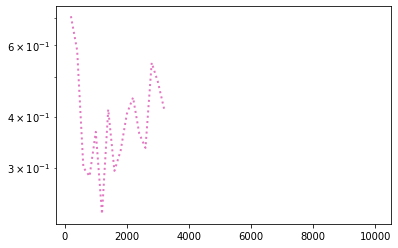

In [264]:
plt.semilogy(disc['num_samples_total'], disc['validation_loss'], label='eval')
#plt.plot(disc['num_samples_total'], disc['training_successes'], label='training')
plt.semilogy(with2k['num_samples_total'], with2k['validation_loss'], label='2keval')
#plt.plot(with2k['num_samples_total'], with2k['training_successes'], label='t2kraining')
plt.semilogy(with2kpretrain50['num_samples_total'], with2kpretrain50['validation_loss'], label='2k_50')
plt.semilogy(with2kpretrain100['num_samples_total'], with2kpretrain100['validation_loss'], label='2k_100')
plt.semilogy(with2kpretrain10['num_samples_total'], with2kpretrain10['validation_loss'], label='2k_10')
plt.semilogy(pos2knegpretrain50['num_samples_total'], pos2knegpretrain50['validation_loss'], label='2kpos2kneg_50',linestyle=':', linewidth=2)
plt.semilogy(pos2knegpretrain100['num_samples_total'], pos2knegpretrain100['validation_loss'], label='2kpos2kneg_100', linestyle=':', linewidth=2)

#plt.plot(w

[0, 0, 0, 0, 10.416292190551758, 0.44959079948253927, 0.03053295165998861, 0.014347350201569497, 0.015644008280942215, 0.0090571510992595, 0.009356496671534842, 0.010594030307693174, 0.008437012065696763, 0.008674966740363744, 0.008502782043797197, 0.011961531476408709, 0.00942524838304962, 0.011139045757154235, 0.010465502985171042, 0.011112532180850393, 0.010781433509255294, 0.007412082302980707, 0.008971927041129675, 0.008568910902249626, 0.0067438913470687116, 0.007724348154006293, 0.009892713936569635, 0.008647227158653549, 0.0051606189664744305, 0.009992614675575169, 0.011661488283425569, 0.010608969269524095, 0.009507299499673535, 0.006655670893524075, 0.00910539714663173, 0.008113996864849468, 0.00848238771839533, 0.0075684290951903675, 0.0075024541848688385, 0.00687487523740856, 0.007495334588784317, 0.009029411396331852, 0.009855640118912561, 0.008892211087513716, 0.008325275710813002, 0.011949286022718298, 0.006400962417392293, 0.00915870040145819, 0.007850169548182748, 0.00

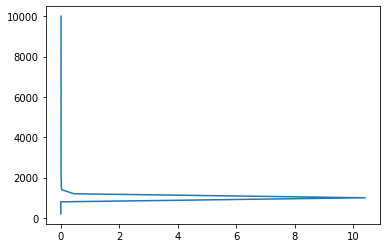

In [265]:
#print(disc['average_training_loss'])

In [266]:
buffer = np.load('others/others/logs/disc_dqn_buffer/train_buffer.npy', allow_pickle=True).item()

In [267]:
indices = buffer['rewards'] == 0
indices = indices.flatten()

In [168]:
buffer['rewards'][indices].shape

(7715, 1)

In [169]:
buffer['rewards'].shape

(10000, 1)

In [175]:
#buffer['observations'].shape
#buffer['observations'][indices]
subset = np.arange(sum(indices))
np.random.shuffle(subset)#[:2000]
subset= subset[:2000]
print(subset)

[ 272 6637 3332 ... 5837  793 5322]


In [176]:
new_data = {}
for key in buffer.keys():
    new_data[key] = buffer[key][indices][subset]

In [177]:
new_data
np.save('others/2k_negatives.npy', new_data)